### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


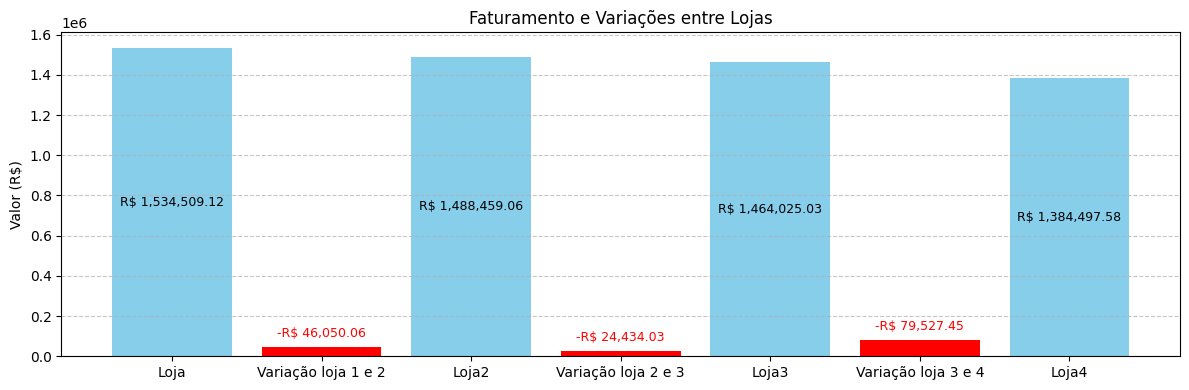

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculando faturamentos
faturamento = loja['Preço'].sum()
faturamento2 = loja2['Preço'].sum()
faturamento3 = loja3['Preço'].sum()
faturamento4 = loja4['Preço'].sum()

# Calculando variações
variacao_valor = faturamento2 - faturamento
variacao_valor2 = faturamento3 - faturamento2
variacao_valor3 = faturamento4 - faturamento3

# Dados
lojas = ['Loja', 'Variação loja 1 e 2', 'Loja2', 'Variação loja 2 e 3', 'Loja3', 'Variação loja 3 e 4', 'Loja4']
valores = [faturamento, abs(variacao_valor), faturamento2, abs(variacao_valor2), faturamento3, abs(variacao_valor3), faturamento4]

# Tipos (para definir cor depois)
tipos = ['faturamento', 'variacao', 'faturamento', 'variacao', 'faturamento', 'variacao', 'faturamento']

# Posições no eixo x
x = np.arange(len(lojas))

# Gráfico
fig, ax = plt.subplots(figsize=(12,4))

# Cores para faturamento e variação
cores = ['skyblue' if tipo == 'faturamento' else ('green' if i%2==1 and [variacao_valor, variacao_valor2, variacao_valor3][(i-1)//2] >= 0 else 'red') for i, tipo in enumerate(tipos)]

# Barras
barras = ax.bar(x, valores, color=cores)

# Títulos
ax.set_title('Faturamento e Variações entre Lojas')
ax.set_ylabel('Valor (R$)')
ax.set_xticks(x)
ax.set_xticklabels(lojas)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores nas barras
for i, barra in enumerate(barras):
    altura = barra.get_height()
    if tipos[i] == 'faturamento':
        # Faturamento: valor dentro da barra
        ax.annotate(f'R$ {altura:,.2f}',
                    xy=(barra.get_x() + barra.get_width()/2, altura/2),
                    ha='center', va='center',
                    fontsize=9, color='black')
    else:
        # Variação: valor acima da barra
        original_variacao = [variacao_valor, variacao_valor2, variacao_valor3][(i-1)//2]
        texto_variacao = f'+R$ {abs(original_variacao):,.2f}' if original_variacao >= 0 else f'-R$ {abs(original_variacao):,.2f}'
        ax.annotate(texto_variacao,
                    xy=(barra.get_x() + barra.get_width()/2, altura),
                    xytext=(0, 5), textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=9, color='green' if original_variacao >= 0 else 'red')

plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [ ]:
categorias_loja = loja["Categoria do Produto"].value_counts()
categorias_loja2 = loja2["Categoria do Produto"].value_counts()
categorias_loja3 = loja3["Categoria do Produto"].value_counts()
categorias_loja4 = loja4["Categoria do Produto"].value_counts()



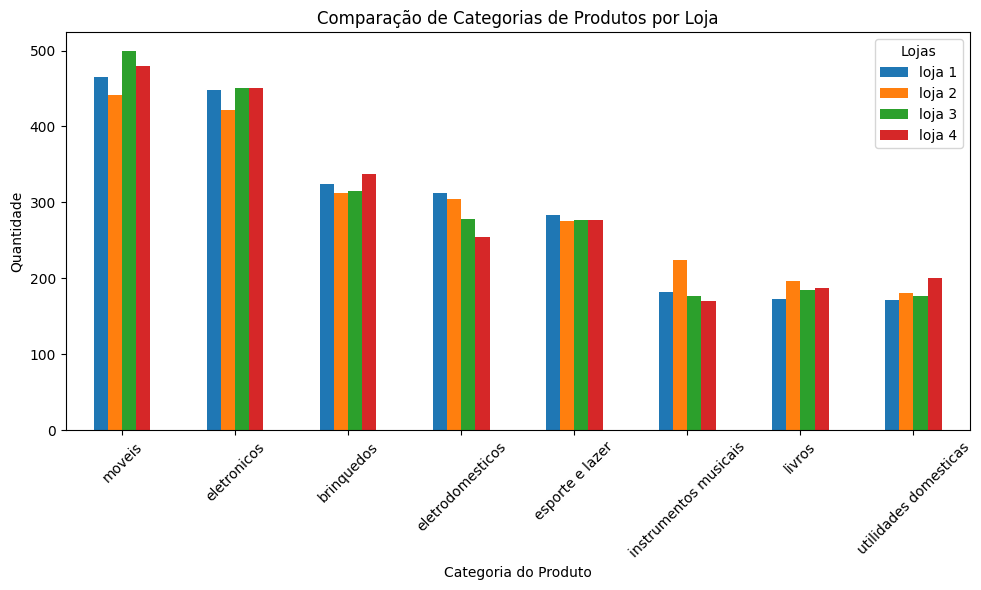

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você tenha os dados em um DataFrame
data = {
    'Categoria do Produto': ['moveis', 'eletronicos', 'brinquedos', 'eletrodomesticos', 'esporte e lazer',
                            'instrumentos musicais', 'livros', 'utilidades domesticas'],
    'loja 1': [465, 448, 324, 312, 284, 182, 173, 171],
    'loja 2': [442, 422, 313, 305, 275, 224, 197, 181],
    'loja 3': [499, 451, 315, 278, 277, 177, 185, 177],
    'loja 4': [480, 451, 338, 254, 277, 170, 187, 201]
}

df = pd.DataFrame(data)

# Definindo o índice como a categoria do produto
df.set_index('Categoria do Produto', inplace=True)

# Criando o gráfico de barras
df.plot(kind='bar', figsize=(10, 6))

# Adicionando título e rótulos
plt.title('Comparação de Categorias de Produtos por Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade')
plt.legend(title='Lojas')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

# 3. Média de Avaliação das Lojas

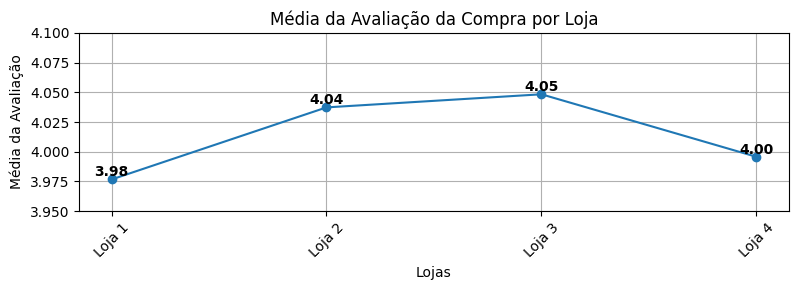

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você tenha as médias calculadas
media_avaliacao = loja['Avaliação da compra'].mean()
media_avaliacao2 = loja2['Avaliação da compra'].mean()
media_avaliacao3 = loja3['Avaliação da compra'].mean()
media_avaliacao4 = loja4['Avaliação da compra'].mean()

# Criando uma lista com as médias
medias = [media_avaliacao, media_avaliacao2, media_avaliacao3, media_avaliacao4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Criando o gráfico de linha
plt.figure(figsize=(8, 3))
plt.plot(lojas, medias, marker='o')

# Ajustando a escala do eixo y
plt.ylim(3.95, 4.10)

# Adicionando título e rótulos
plt.title('Média da Avaliação da Compra por Loja')
plt.xlabel('Lojas')
plt.ylabel('Média da Avaliação')
plt.xticks(rotation=45)
plt.grid()

# Adicionando os valores nos pontos
for i, valor in enumerate(medias):
    plt.text(lojas[i], valor, f'{valor:.2f}', ha='center', va='bottom', fontweight='bold')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você já tenha os dados das lojas
produtos_mais_vendidos1 = loja['Produto'].value_counts().head()
produtos_menos_vendidos1 = loja['Produto'].value_counts().tail()

produtos_mais_vendidos2 = loja2['Produto'].value_counts().head()
produtos_menos_vendidos2 = loja2['Produto'].value_counts().tail()

produtos_mais_vendidos3 = loja3['Produto'].value_counts().head()
produtos_menos_vendidos3 = loja3['Produto'].value_counts().tail()

produtos_mais_vendidos4 = loja4['Produto'].value_counts().head()
produtos_menos_vendidos4 = loja4['Produto'].value_counts().tail()

print(produtos_mais_vendidos1)
print(produtos_menos_vendidos1)




Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Name: count, dtype: int64
Produto
Ciência de dados com python    39
Pandeiro                       36
Panela de pressão              35
Headset                        33
Celular ABXY                   33
Name: count, dtype: int64


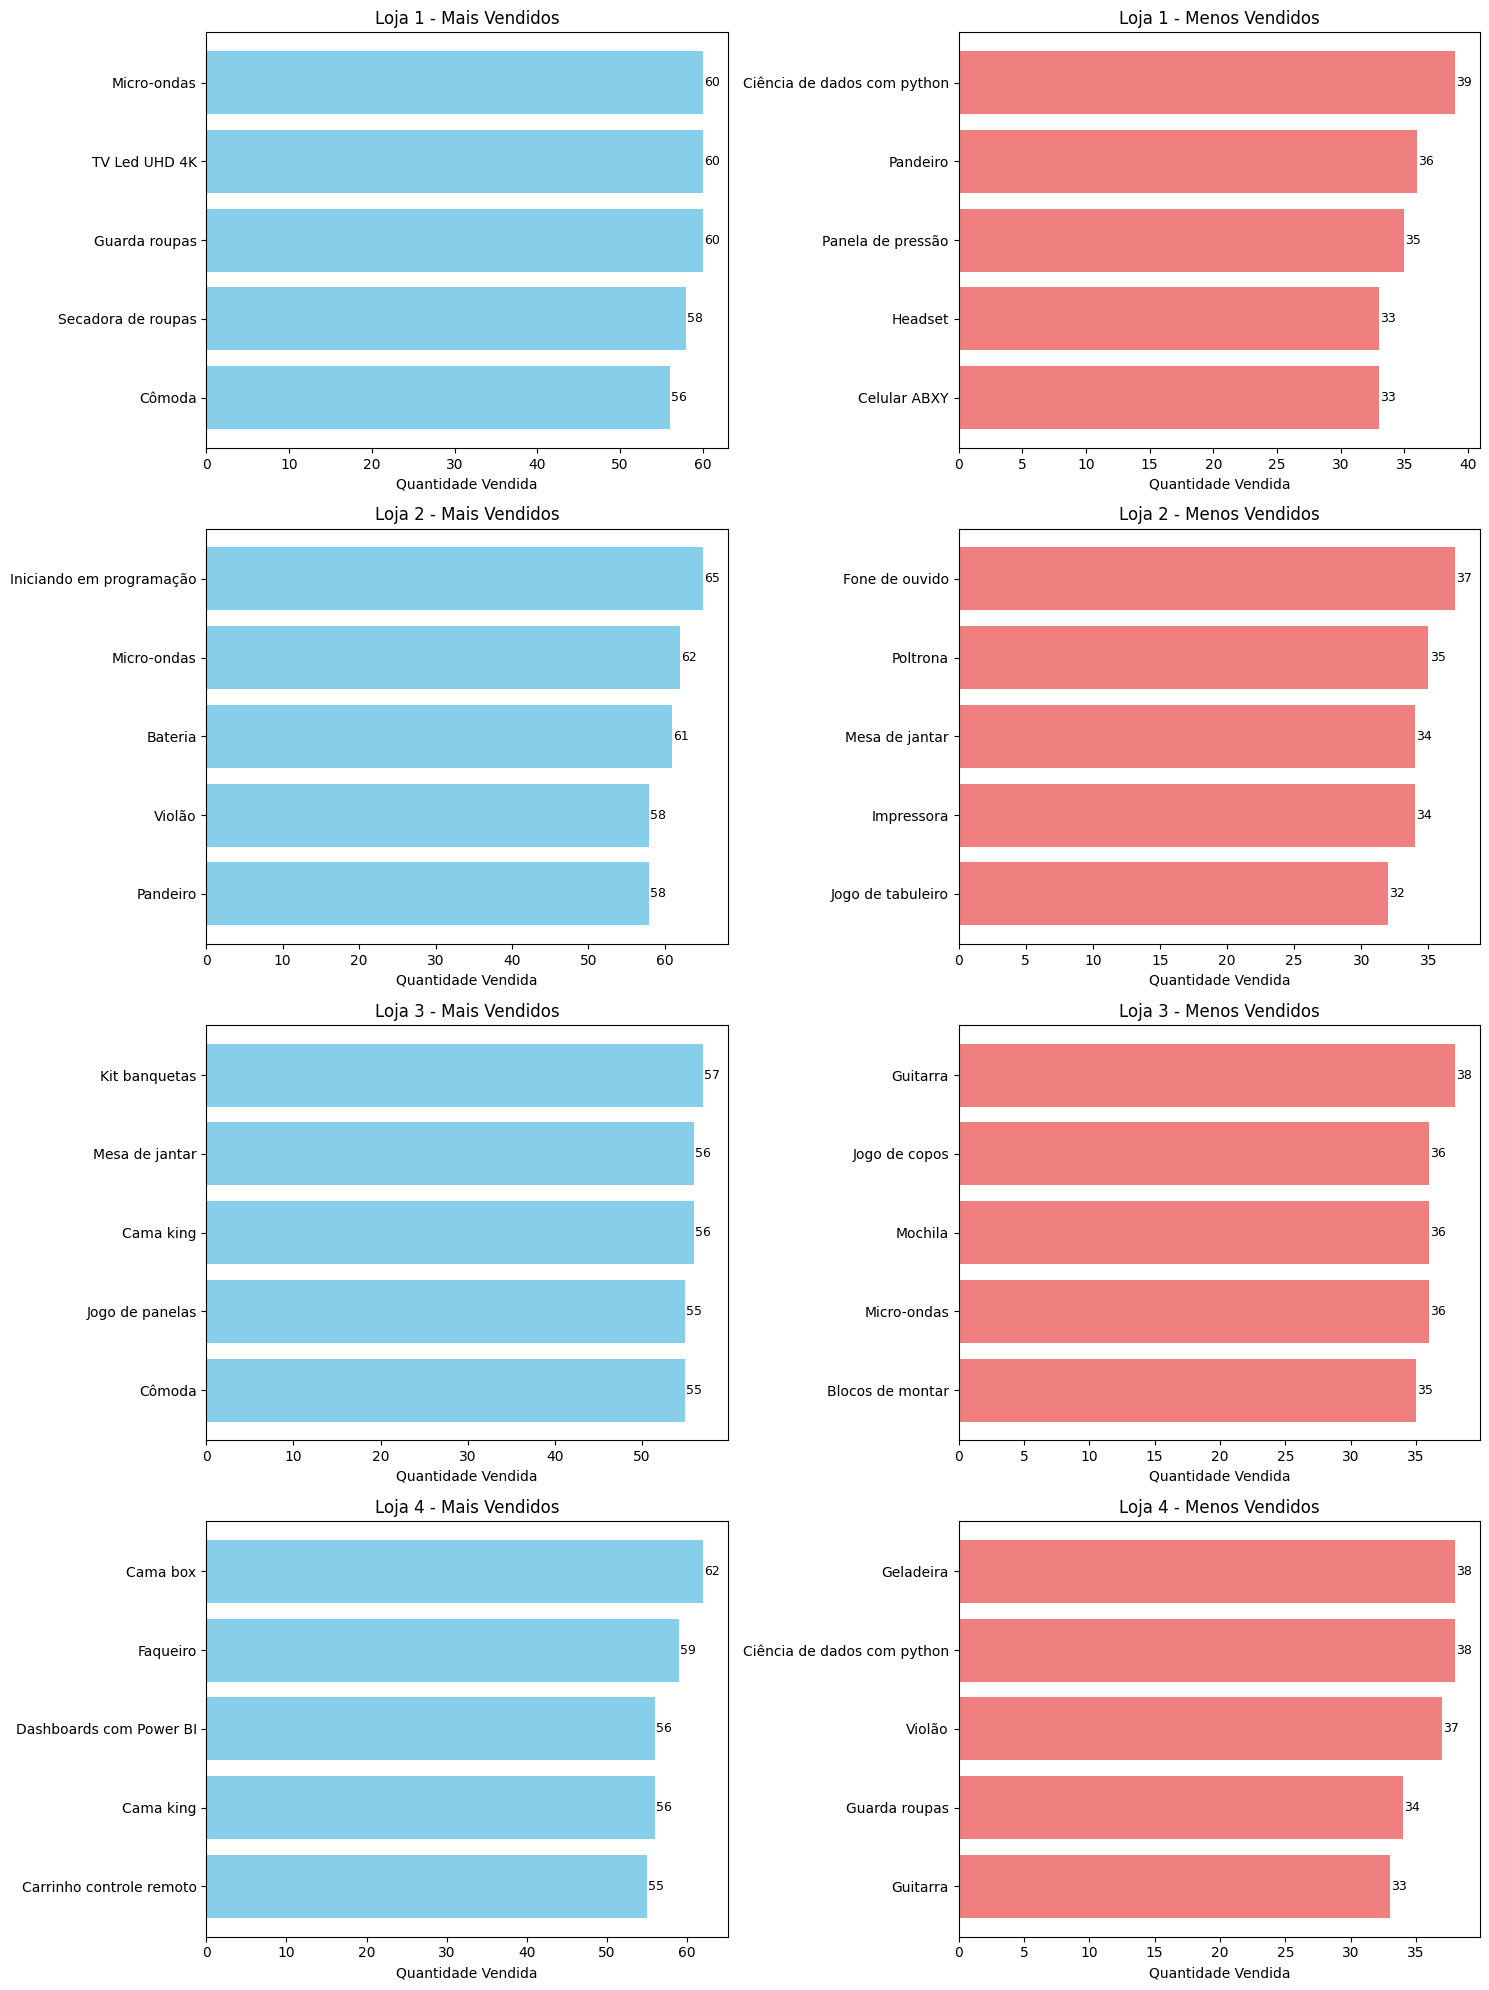

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Produtos mais e menos vendidos já extraídos
# (produtos_mais_vendidos1, produtos_menos_vendidos1, etc.)

# Criando subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))  # 4 lojas, 2 gráficos por loja (mais e menos vendidos)

# Dados organizados para facilitar
dados = [
    (produtos_mais_vendidos1, produtos_menos_vendidos1, 'Loja 1'),
    (produtos_mais_vendidos2, produtos_menos_vendidos2, 'Loja 2'),
    (produtos_mais_vendidos3, produtos_menos_vendidos3, 'Loja 3'),
    (produtos_mais_vendidos4, produtos_menos_vendidos4, 'Loja 4')
]

for i, (mais_vendidos, menos_vendidos, nome_loja) in enumerate(dados):
    # Gráfico dos mais vendidos
    bars1 = axs[i, 0].barh(mais_vendidos.index, mais_vendidos.values, color='skyblue')
    axs[i, 0].set_title(f'{nome_loja} - Mais Vendidos')
    axs[i, 0].invert_yaxis()
    axs[i, 0].set_xlabel('Quantidade Vendida')

    # Adicionar valores nas barras (mais vendidos)
    for bar in bars1:
        largura = bar.get_width()
        axs[i, 0].text(largura + 0.1, bar.get_y() + bar.get_height()/2, f'{int(largura)}',
                       va='center', fontsize=9)

    # Gráfico dos menos vendidos
    bars2 = axs[i, 1].barh(menos_vendidos.index, menos_vendidos.values, color='lightcoral')
    axs[i, 1].set_title(f'{nome_loja} - Menos Vendidos')
    axs[i, 1].invert_yaxis()
    axs[i, 1].set_xlabel('Quantidade Vendida')

    # Adicionar valores nas barras (menos vendidos)
    for bar in bars2:
        largura = bar.get_width()
        axs[i, 1].text(largura + 0.1, bar.get_y() + bar.get_height()/2, f'{int(largura)}',
                       va='center', fontsize=9)

plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


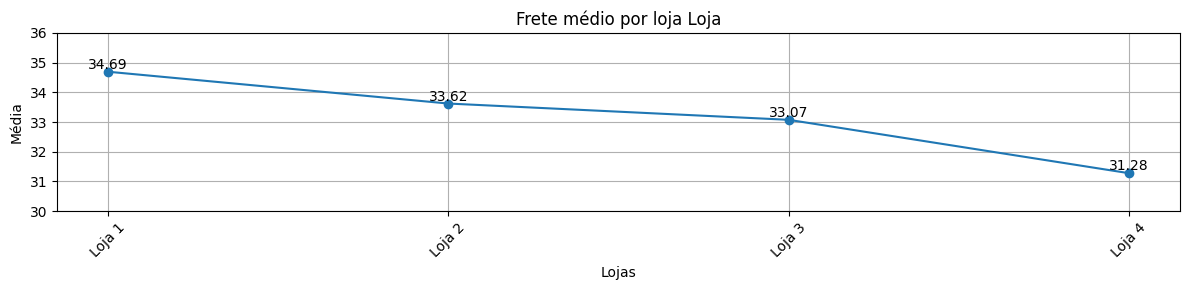

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você já tenha as médias de avaliação calculadas
media_avaliacao1 = loja['Frete'].mean()
media_avaliacao2 = loja2['Frete'].mean()
media_avaliacao3 = loja3['Frete'].mean()
media_avaliacao4 = loja4['Frete'].mean()

# Criando uma lista com as médias
medias = [media_avaliacao1, media_avaliacao2, media_avaliacao3, media_avaliacao4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Criando o gráfico de linha com área ampliada
plt.figure(figsize=(12, 3))  # Aumentando a área do gráfico
plt.plot(lojas, medias, marker='o')

# Adicionando os valores nos pontos
for i, valor in enumerate(medias):
    plt.text(lojas[i], valor, f'{valor:.2f}', ha='center', va='bottom')

# Ajustando a escala do eixo y
plt.ylim(30, 36)

# Adicionando título e rótulos
plt.title('Frete médio por loja Loja')
plt.xlabel('Lojas')
plt.ylabel('Média')
plt.xticks(rotation=45)
plt.grid()

# Exibindo o gráfico
plt.tight_layout()
plt.show()